# Rating Prediction

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Rating=pd.read_csv('Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For the peoples who R going to buy R they buye...
4,4,5,It's good gameing laptop in this price Display...


In [3]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
Rating.shape

(33294, 2)

In [5]:
Rating.columns

Index(['Ratings', 'Full_review'], dtype='object')

In [6]:
Rating.dtypes

Ratings         int64
Full_review    object
dtype: object

In [7]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33294 entries, 0 to 33293
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      33294 non-null  int64 
 1   Full_review  33294 non-null  object
dtypes: int64(1), object(1)
memory usage: 520.3+ KB


In [8]:
Rating.isnull().sum()

Ratings        0
Full_review    0
dtype: int64

<AxesSubplot:>

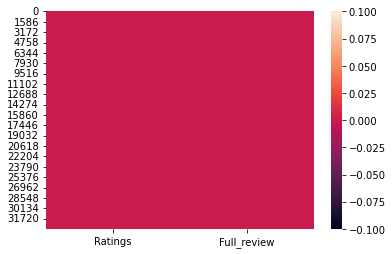

In [9]:
sns.heatmap(Rating.isnull())

There is no null values in the dataset.

In [10]:
Rating.nunique()

Ratings            5
Full_review    16100
dtype: int64

In [11]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [12]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,this is the best laptop in this range.i reciev...,512
1,5,good product as used of now.... everything is ...,271
2,5,awesome laptop. it supports many high spec gam...,100
3,4,for the peoples who r going to buy r they buye...,531
4,5,it's good gameing laptop in this price display...,106


In [14]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [15]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,this is the best laptop in this range.i reciev...,512,512
1,5,good product as used of now.... everything is ...,271,271
2,5,awesome laptop. it supports many high spec gam...,100,100
3,4,for the peoples who r going to buy r they buye...,531,531
4,5,it's good gameing laptop in this price display...,106,106


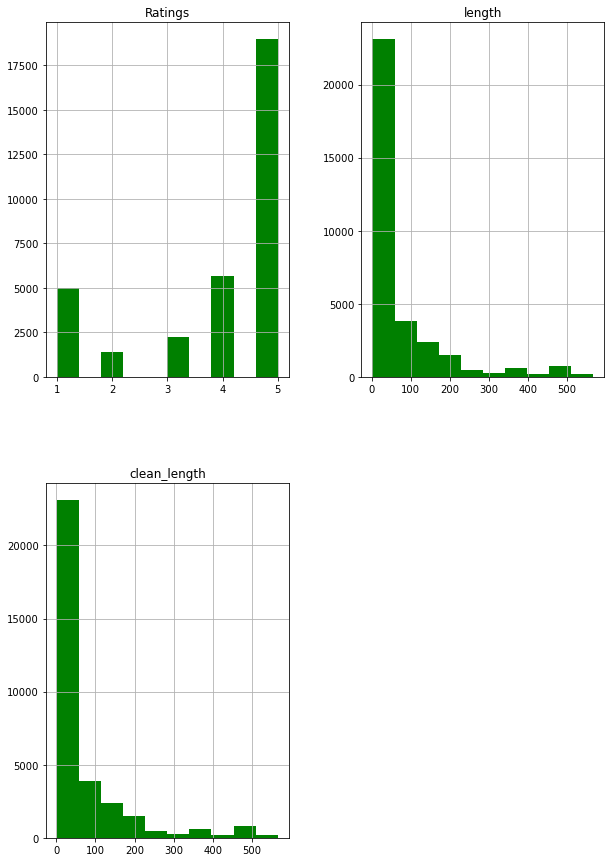

In [16]:
Rating.hist(figsize=(10,15),color = 'green');

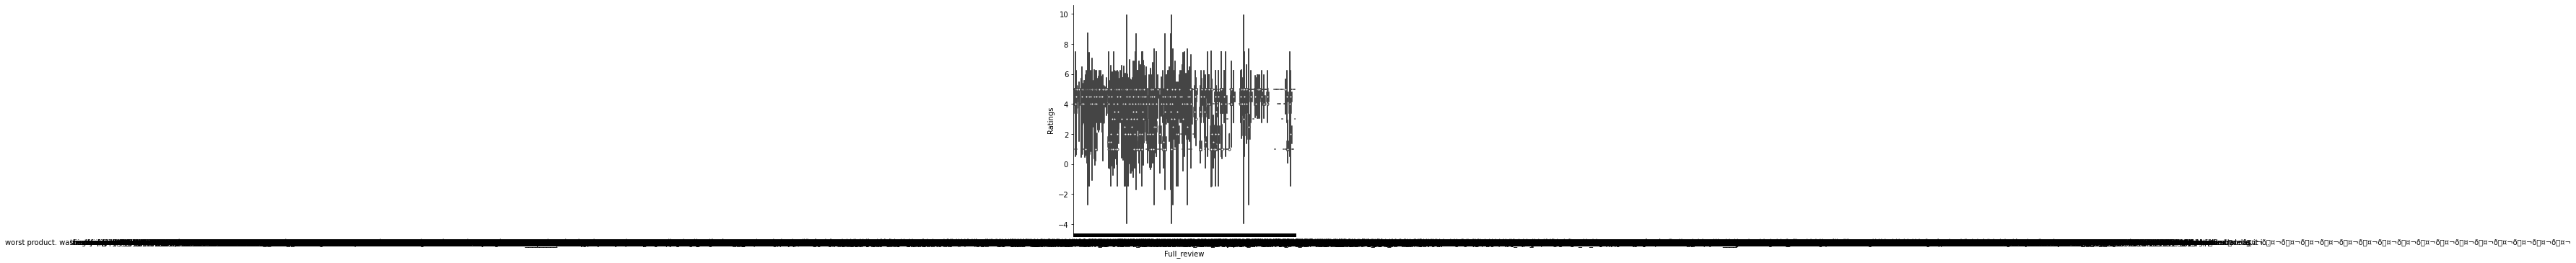

In [17]:
#Set up a category plot
g=sns.catplot(x="Full_review",y="Ratings",data=Rating,kind="violin")
#show plot
plt.show()

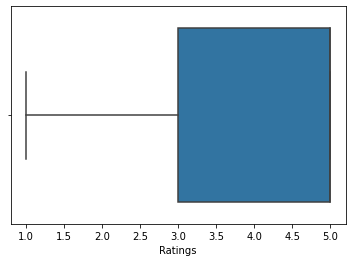

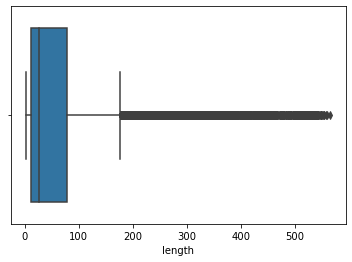

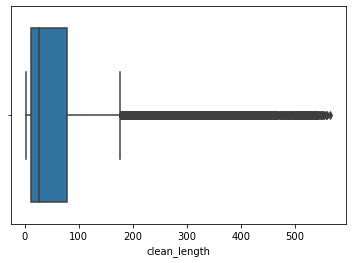

In [18]:
for i in Rating.describe().columns:
    sns.boxplot(Rating[i])
    plt.show()

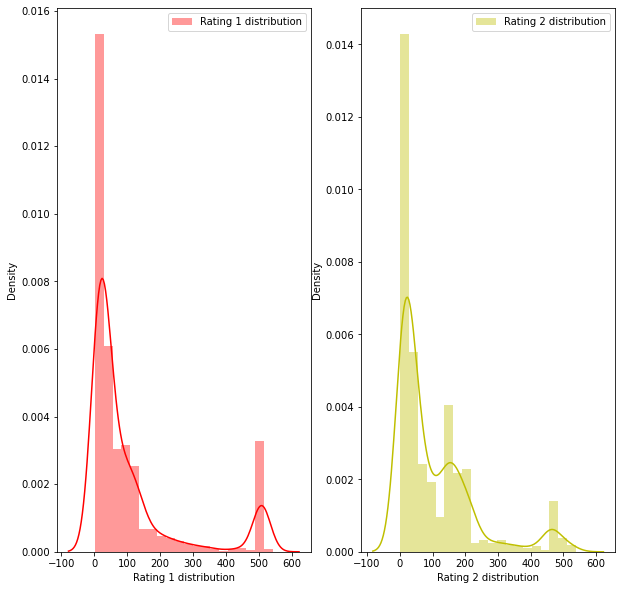

In [19]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

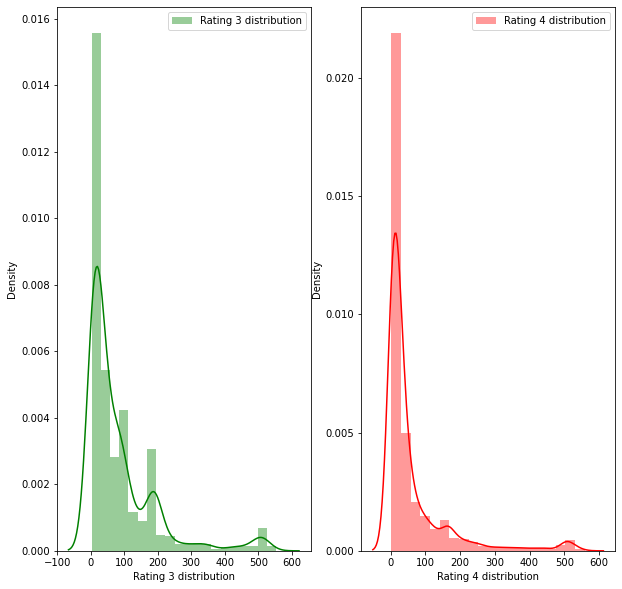

In [20]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

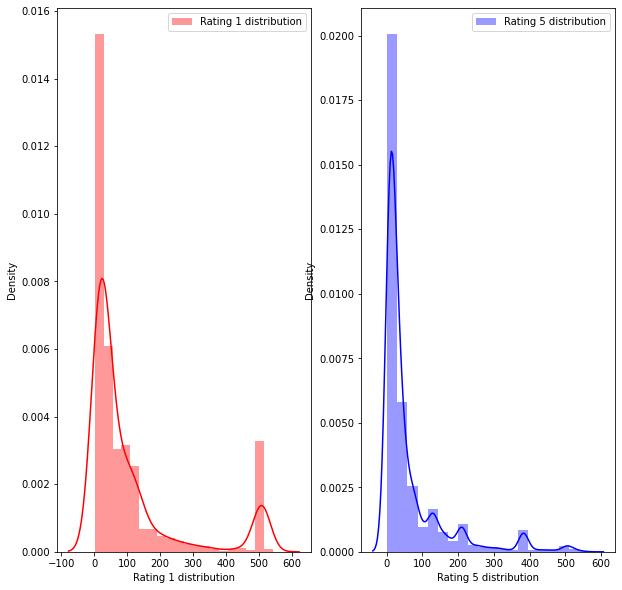

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

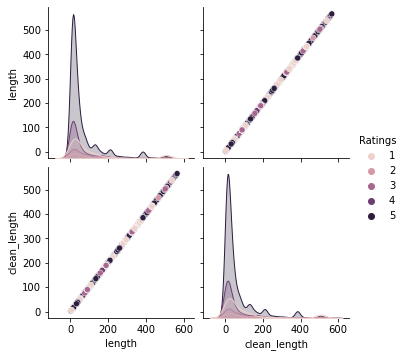

In [24]:
sns.pairplot(Rating,hue="Ratings")

In [25]:
# Using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

In [26]:
x=feature1
y=Rating['Ratings']

In [27]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

# Model Building

In [28]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [29]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)

RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.6826850878510287


Cross_Val_Score =  0.6151498118725514


classification_report
               precision    recall  f1-score   support

           1       0.77      0.77      0.77       997
           2       0.65      0.37      0.47       282
           3       0.44      0.28      0.34       426
           4       0.35      0.48      0.41      1111
           5       0.81      0.79      0.80      3843

    accuracy                           0.68      6659
   macro avg       0.61      0.54      0.56      6659
weighted avg       0.70      0.68      0.69      6659



[[ 771   18   27  125   56]
 [  85  103   23   52   19]
 [  60   16  120  111  119]
 [  26    9   35  535  506]
 [  53   13   69  691 3017]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCl

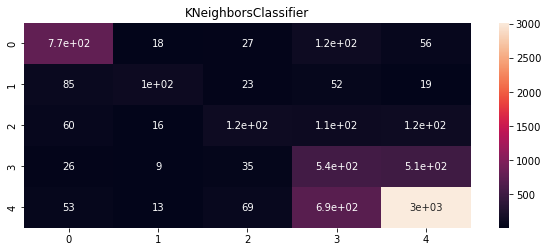

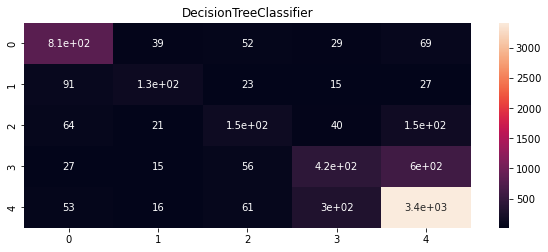

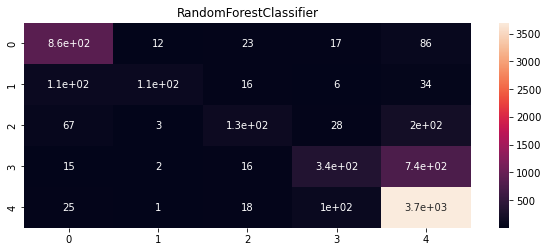

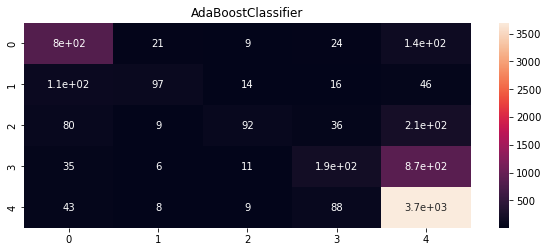

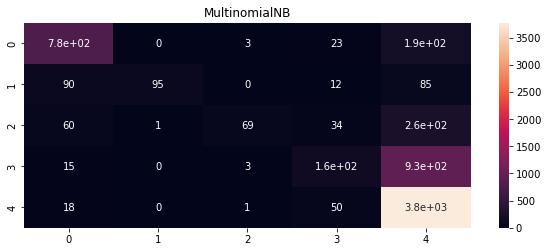

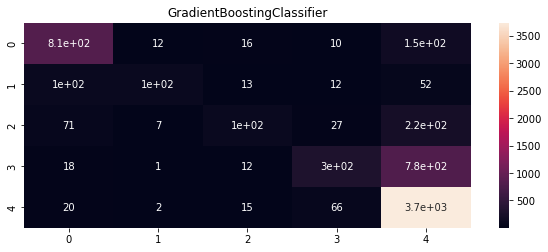

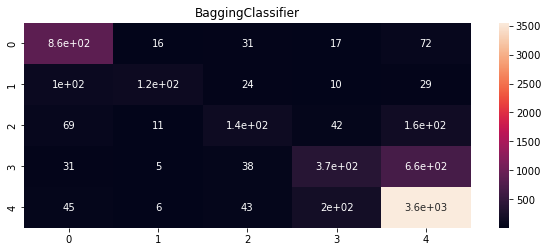

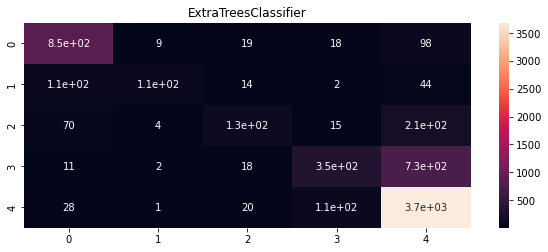

In [30]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [31]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,68.268509,61.514981
1,DecisionTreeClassifier,73.794864,66.504406
2,RandomForestClassifier,77.113681,70.832423
3,AdaBoostClassifier,73.254242,68.045177
4,MultinomialNB,73.194173,68.144600
5,GradientBoostingClassifier,75.867247,71.517457
6,BaggingClassifier,75.777144,69.429715
7,ExtraTreesClassifier,76.978525,70.808457


The best classifier which suits for this dataset is RandomForestClassifier with the accuracy of 77.11 

# Using gridsearch cv to find the best parameters in random forest

In [33]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 200}


In [38]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=12, n_estimators=200)
rfc.fit(x_train,y_train)
rfc.score(x,y)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.757170746358312
[[ 834    0    0    4  159]
 [ 112   95    0    2   73]
 [  79    0   70    6  271]
 [  21    0    1  243  846]
 [  26    0    0   17 3800]]
              precision    recall  f1-score   support

           1       0.78      0.84      0.81       997
           2       1.00      0.34      0.50       282
           3       0.99      0.16      0.28       426
           4       0.89      0.22      0.35      1111
           5       0.74      0.99      0.85      3843

    accuracy                           0.76      6659
   macro avg       0.88      0.51      0.56      6659
weighted avg       0.80      0.76      0.71      6659



 Random forest classifier is giving us best results so we save it as our final model

In [36]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']

In [37]:
model=joblib.load('Ratings_prediction.csv')